# To Find whether 'total victims' suffered during mass shooting is dependent on 'age of the shooter', 'mental health issues', 'gender' or 'race'

In [62]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats

In [2]:
df = pd.read_excel('Mass_shootings.xlsx')
df.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,New Mexico neighborhood shooting,"Farmington, New Mexico",2023-05-15,"Beau Wilson, 18, opened fire in a residential ...",3,6,9,Other,18,yes,...,AR-15-style rifle,White,M,https://www.cbsnews.com/news/farmington-shooti...,https://www.nbcnews.com/news/us-news/beau-wils...,-,-,-,mass,2023
1,Texas outlet mall shooting,"Allen, Texas",2023-05-06,"Mauricio Garcia, 33, wore tactical gear and us...",8,7,15,Other,33,yes,...,AR-15-style rifle,Latino,M,https://www.nytimes.com/2023/05/07/us/texas-ma...,-,-,-,-,Mass,2023
2,Louisville bank shooting,"Louisville, Kentucky",2023-04-10,"Connor Sturgeon, 25, opened fire inside Old Na...",5,8,13,workplace,25,yes,...,AR-15 rifle,White,M,https://apnews.com/article/downtown-louisville...,-,-,-,-,Mass,2023
3,Nashville Christian school shooting,"Nashville, Tennessee",2023-03-27,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,-,...,-,White,"F (""identifies as transgender"" and ""Audrey Hal...",https://www.tennessean.com/story/news/crime/20...,-,-,-,-,Mass,2023
4,Michigan State University shooting,"East Lansing, Michigan",2023-02-13,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,-,...,-,Black,M,https://www.cnn.com/us/live-news/michigan-stat...,-,-,-,-,Mass,2023


In [3]:
df_final = df[['age_of_shooter', 'prior_signs_mental_health_issues', 'race', 'gender', 'total_victims']]

In [4]:
df_final.head()

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18,yes,White,M,9
1,33,yes,Latino,M,15
2,25,yes,White,M,13
3,28,-,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43,-,Black,M,8


In [5]:
df_final.shape

(144, 5)

In [6]:
df_final.dtypes

age_of_shooter                      object
prior_signs_mental_health_issues    object
race                                object
gender                              object
total_victims                        int64
dtype: object

In [7]:
df_final = df_final.replace('-', np.nan)

In [8]:
df_final.head()

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,yes,White,M,9
1,33.0,yes,Latino,M,15
2,25.0,yes,White,M,13
3,28.0,NaN,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,NaN,Black,M,8


# Treating NULL values

In [9]:
df_final.isnull().sum()/ len(df_final) * 100

age_of_shooter                       1.388889
prior_signs_mental_health_issues    19.444444
race                                 8.333333
gender                               0.000000
total_victims                        0.000000
dtype: float64

In [10]:
df_final.dropna(subset = 'age_of_shooter', inplace = True)

In [11]:
df_final.isnull().sum()/ len(df_final) * 100

age_of_shooter                       0.000000
prior_signs_mental_health_issues    18.309859
race                                 7.746479
gender                               0.000000
total_victims                        0.000000
dtype: float64

In [12]:
df_final.head()

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,yes,White,M,9
1,33.0,yes,Latino,M,15
2,25.0,yes,White,M,13
3,28.0,NaN,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,NaN,Black,M,8


In [13]:
le = LabelEncoder()

In [14]:
df_final['prior_signs_mental_health_issues'] = le.fit_transform(df_final['prior_signs_mental_health_issues'])

In [15]:
df_final.head()

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,6,White,M,9
1,33.0,6,Latino,M,15
2,25.0,6,White,M,13
3,28.0,7,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,7,Black,M,8


In [16]:
df_final['prior_signs_mental_health_issues'] = df_final['prior_signs_mental_health_issues'].replace(7, np.nan)

In [17]:
df_final.head()

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,6.0,White,M,9
1,33.0,6.0,Latino,M,15
2,25.0,6.0,White,M,13
3,28.0,NaN,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,NaN,Black,M,8


In [18]:
imputer = SimpleImputer()

In [19]:
df_final['prior_signs_mental_health_issues'] = imputer.fit_transform(df_final['prior_signs_mental_health_issues'].values.reshape(-1, 1))

In [20]:
df_final.head()

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,6.000000,White,M,9
1,33.0,6.000000,Latino,M,15
2,25.0,6.000000,White,M,13
3,28.0,3.568966,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,3.568966,Black,M,8


In [21]:
df_final['prior_signs_mental_health_issues'] = df_final['prior_signs_mental_health_issues'].astype(float).round()

In [22]:
df_final['prior_signs_mental_health_issues'] = le.inverse_transform(df_final['prior_signs_mental_health_issues'].astype(int))

In [23]:
df_final.head()

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,yes,White,M,9
1,33.0,yes,Latino,M,15
2,25.0,yes,White,M,13
3,28.0,Unknown,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,Unknown,Black,M,8


In [24]:
df_final

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,yes,White,M,9
1,33.0,yes,Latino,M,15
2,25.0,yes,White,M,13
3,28.0,Unknown,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,Unknown,Black,M,8
5,67.0,Unknown,Asian,M,8
6,72.0,yes,Asian,M,21
7,31.0,Unknown,Black,M,12
8,22.0,yes,White,M,30
9,22.0,Unknown,Black,M,5


In [25]:
df_final['race'] = le.fit_transform(df_final['race'])

In [26]:
df_final

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,yes,5,M,9
1,33.0,yes,2,M,15
2,25.0,yes,5,M,13
3,28.0,Unknown,5,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,Unknown,1,M,8
5,67.0,Unknown,0,M,8
6,72.0,yes,0,M,21
7,31.0,Unknown,1,M,12
8,22.0,yes,5,M,30
9,22.0,Unknown,1,M,5


In [27]:
df_final['race'] = df_final['race'].replace(10, np.nan)

In [28]:
df_final['race'] = imputer.fit_transform(df_final['race'].values.reshape(-1, 1))

In [29]:
df_final['race'] = df_final['race'].astype(float).round()

In [30]:
df_final['race'] = le.inverse_transform(df_final['race'].astype(int))

In [31]:
df_final.isnull().sum()

age_of_shooter                      0
prior_signs_mental_health_issues    0
race                                0
gender                              0
total_victims                       0
dtype: int64

In [32]:
df_final['gender'] = df_final['gender'].replace('Male', 'M')
df_final['gender'] = df_final['gender'].replace('Female', 'F')

In [33]:
df_final

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,yes,White,M,9
1,33.0,yes,Latino,M,15
2,25.0,yes,White,M,13
3,28.0,Unknown,White,"F (""identifies as transgender"" and ""Audrey Hal...",12
4,43.0,Unknown,Black,M,8
5,67.0,Unknown,Asian,M,8
6,72.0,yes,Asian,M,21
7,31.0,Unknown,Black,M,12
8,22.0,yes,White,M,30
9,22.0,Unknown,Black,M,5


In [34]:
df_final['gender'] = df_final['gender'].replace('F ("identifies as transgender" and "Audrey Hale is a biological woman who, on a social media profile, used male pronouns,” according to Nashville Metro PD officials)', 'F')

In [35]:
df_final

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,yes,White,M,9
1,33.0,yes,Latino,M,15
2,25.0,yes,White,M,13
3,28.0,Unknown,White,F,12
4,43.0,Unknown,Black,M,8
5,67.0,Unknown,Asian,M,8
6,72.0,yes,Asian,M,21
7,31.0,Unknown,Black,M,12
8,22.0,yes,White,M,30
9,22.0,Unknown,Black,M,5


In [36]:
df_final.drop(labels = 66, inplace=True)

In [37]:
df_final

,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,18.0,yes,White,M,9
1,33.0,yes,Latino,M,15
2,25.0,yes,White,M,13
3,28.0,Unknown,White,F,12
4,43.0,Unknown,Black,M,8
5,67.0,Unknown,Asian,M,8
6,72.0,yes,Asian,M,21
7,31.0,Unknown,Black,M,12
8,22.0,yes,White,M,30
9,22.0,Unknown,Black,M,5


In [38]:
df_final.reset_index()

,index,age_of_shooter,prior_signs_mental_health_issues,race,gender,total_victims
0,0,18.0,yes,White,M,9
1,1,33.0,yes,Latino,M,15
2,2,25.0,yes,White,M,13
3,3,28.0,Unknown,White,F,12
4,4,43.0,Unknown,Black,M,8
5,5,67.0,Unknown,Asian,M,8
6,6,72.0,yes,Asian,M,21
7,7,31.0,Unknown,Black,M,12
8,8,22.0,yes,White,M,30
9,9,22.0,Unknown,Black,M,5


In [39]:
df_final.shape

(141, 5)

In [40]:
df_final.dtypes

age_of_shooter                      float64
prior_signs_mental_health_issues     object
race                                 object
gender                               object
total_victims                         int64
dtype: object

In [41]:
df_final['prior_signs_mental_health_issues'] = df_final['prior_signs_mental_health_issues'].replace('yes', 'Yes')

In [42]:
df_final['race'] = df_final['race'].replace('white', 'White')

In [43]:
df_final.columns

Index(['age_of_shooter', 'prior_signs_mental_health_issues', 'race', 'gender',
       'total_victims'],
      dtype='object')

In [44]:
df_final = pd.get_dummies(data = df_final, columns = ['prior_signs_mental_health_issues', 'race', 'gender'], drop_first = True)

In [45]:
df_final.head()

,age_of_shooter,total_victims,prior_signs_mental_health_issues_TBD,prior_signs_mental_health_issues_Unclear,prior_signs_mental_health_issues_Unclear,prior_signs_mental_health_issues_Unknown,prior_signs_mental_health_issues_Yes,race_Black,race_Latino,race_Native American,race_Other,race_White,race_White,race_black,race_unclear,gender_M
0,18.0,9,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,33.0,15,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,25.0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,28.0,12,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,43.0,8,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [46]:
df_final.shape

(141, 16)

In [47]:
df_final['total_victims'].skew()

10.539251531945336

In [48]:
df_final.corr()

,age_of_shooter,total_victims,prior_signs_mental_health_issues_TBD,prior_signs_mental_health_issues_Unclear,prior_signs_mental_health_issues_Unclear,prior_signs_mental_health_issues_Unknown,prior_signs_mental_health_issues_Yes,race_Black,race_Latino,race_Native American,race_Other,race_White,race_White,race_black,race_unclear,gender_M
age_of_shooter,1.000000,0.128825,0.074743,-0.059715,0.065070,-0.032274,-0.022856,0.041819,-0.004769,-0.099448,-0.056796,-0.158090,-0.005605,0.141487,-0.037730,-0.021143
total_victims,0.128825,1.000000,0.416858,-0.039332,0.003304,-0.067035,-0.039934,-0.064640,-0.048260,-0.028576,0.078812,0.095166,-0.026222,-0.044977,-0.021301,0.036434
prior_signs_mental_health_issues_TBD,0.074743,0.416858,1.000000,-0.082443,-0.016205,-0.093314,-0.187704,0.058218,-0.058481,-0.028271,-0.032763,0.074717,-0.016205,-0.050067,-0.016205,0.032763
prior_signs_mental_health_issues_Unclear,-0.059715,-0.039332,-0.082443,1.000000,-0.036339,-0.209251,-0.420917,0.105196,0.008941,0.072040,0.397404,-0.217109,0.196561,-0.032321,-0.036339,0.073470
prior_signs_mental_health_issues_Unclear,0.065070,0.003304,-0.016205,-0.036339,1.000000,-0.041131,-0.082736,-0.029161,-0.025777,-0.012461,-0.014441,0.067588,-0.007143,-0.022068,-0.007143,0.014441
prior_signs_mental_health_issues_Unknown,-0.032274,-0.067035,-0.093314,-0.209251,-0.041131,1.000000,-0.476418,0.182841,-0.019241,0.053152,-0.083157,0.019656,-0.041131,-0.127076,-0.041131,-0.242541
prior_signs_mental_health_issues_Yes,-0.022856,-0.039934,-0.187704,-0.420917,-0.082736,-0.476418,1.000000,-0.199724,0.057335,-0.046021,-0.167274,0.142959,-0.082736,-0.081502,-0.082736,0.081819
race_Black,0.041819,-0.064640,0.058218,0.105196,-0.029161,0.182841,-0.199724,1.000000,-0.105234,-0.050872,-0.058956,-0.431448,-0.029161,-0.090094,-0.029161,-0.079591
race_Latino,-0.004769,-0.048260,-0.058481,0.008941,-0.025777,-0.019241,0.057335,-0.105234,1.000000,-0.044969,-0.052115,-0.381385,-0.025777,-0.079640,-0.025777,0.052115
race_Native American,-0.099448,-0.028576,-0.028271,0.072040,-0.012461,0.053152,-0.046021,-0.050872,-0.044969,1.000000,-0.025194,-0.184369,-0.012461,-0.038500,-0.012461,-0.270832


In [49]:
df_final.columns

Index(['age_of_shooter', 'total_victims',
       'prior_signs_mental_health_issues_TBD',
       'prior_signs_mental_health_issues_Unclear',
       'prior_signs_mental_health_issues_Unclear ',
       'prior_signs_mental_health_issues_Unknown',
       'prior_signs_mental_health_issues_Yes', 'race_Black', 'race_Latino',
       'race_Native American', 'race_Other', 'race_White', 'race_White ',
       'race_black', 'race_unclear', 'gender_M'],
      dtype='object')

# Base OLS Model

In [50]:
a, b = dmatrices('total_victims ~ age_of_shooter + prior_signs_mental_health_issues_TBD + prior_signs_mental_health_issues_Unclear + prior_signs_mental_health_issues_Unknown + prior_signs_mental_health_issues_Yes + prior_signs_mental_health_issues_Yes + race_Black + race_Latino + race_Other + race_White + race_black + race_unclear + gender_M', data = df_final, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['variable'] = b.columns
vif

,VIF,variable
0,68.450794,Intercept
1,1.077327,age_of_shooter
2,1.315046,prior_signs_mental_health_issues_TBD
3,2.373762,prior_signs_mental_health_issues_Unclear
4,2.470066,prior_signs_mental_health_issues_Unknown
5,2.943368,prior_signs_mental_health_issues_Yes
6,1.960153,race_Black
7,1.742175,race_Latino
8,1.428827,race_Other
9,2.997509,race_White


In [51]:
model = sm.OLS(a, b)
fii = model.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_victims   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     2.803
Date:                Tue, 27 Jun 2023   Prob (F-statistic):            0.00197
Time:                        11:08:46   Log-Likelihood:                -739.45
No. Observations:                 141   AIC:                             1505.
Df Residuals:                     128   BIC:                             1543.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -14.9255     33.529     -0.445      0.657     -81.268      51.417
age_of_shooter                               0.4813      0.320      1.505      0.135      -0.151       1.114
prior_signs_mental_health_issues_TBD       116.4902     25.128      4.636      0.000      66.770     166.211
prior_signs_mental_health_issues_Unclear    -0.2140     17.206     -0.012      0.990     -34.259      33.831
prior_signs_mental_health_issues_Unknown     2.3872     16.187      0.147      0.883     -29.642      34.416
prior_signs_mental_health_issues_Yes         4.9482     13.908      0.356      0.723     -22.572      32.468
race_Black                                  -6.9280     18.402     -0.376      0.707     -43.339      29.483
race_Latino                                  1.5245     19.169      0.080      0.937     -36.405      39.454
race_Other                                  38.9093     29.177      1.334      0.185     -18.823      96.642
race_White                                   9.0851     14.385      0.632      0.529     -19.377      37.547
race_black                                  -1.1045     21.921     -0.050      0.960     -44.479      42.270
race_unclear                                 2.6674     51.849      0.051      0.959     -99.925     105.260
gender_M                                     4.7806     25.356      0.189      0.851     -45.390      54.951
==============================================================================
Omnibus:                      226.341   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28766.911
Skew:                           6.662   Prob(JB):                         0.00
Kurtosis:                      71.695   Cond. No.                         496.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df_final['total_victims'].skew()

10.539251531945336

In [53]:
df_final['total_victims'] = stats.boxcox(df_final['total_victims'])[0]

In [54]:
df_final['total_victims'].skew()

0.021406359283467003

# Model after skewness from the target variable is removed

In [55]:
a1, b1 = dmatrices('total_victims ~ age_of_shooter + prior_signs_mental_health_issues_TBD + prior_signs_mental_health_issues_Unclear + prior_signs_mental_health_issues_Unknown + prior_signs_mental_health_issues_Yes + prior_signs_mental_health_issues_Yes + race_Black + race_Latino + race_Other + race_White + race_black + race_unclear + gender_M', data = df_final, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(b1.values, i) for i in range(b1.shape[1])]
vif['variable'] = b1.columns
vif

,VIF,variable
0,68.450794,Intercept
1,1.077327,age_of_shooter
2,1.315046,prior_signs_mental_health_issues_TBD
3,2.373762,prior_signs_mental_health_issues_Unclear
4,2.470066,prior_signs_mental_health_issues_Unknown
5,2.943368,prior_signs_mental_health_issues_Yes
6,1.960153,race_Black
7,1.742175,race_Latino
8,1.428827,race_Other
9,2.997509,race_White


In [56]:
model2 = sm.OLS(a1, b1)
fii2 = model2.fit()
fii2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_victims   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     2.877
Date:                Tue, 27 Jun 2023   Prob (F-statistic):            0.00153
Time:                        11:08:46   Log-Likelihood:                -23.682
No. Observations:                 141   AIC:                             73.36
Df Residuals:                     128   BIC:                             111.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    1.6061      0.209      7.673      0.000       1.192       2.020
age_of_shooter                              -0.0031      0.002     -1.568      0.119      -0.007       0.001
prior_signs_mental_health_issues_TBD         0.1781      0.157      1.135      0.258      -0.132       0.488
prior_signs_mental_health_issues_Unclear    -0.2298      0.107     -2.139      0.034      -0.442      -0.017
prior_signs_mental_health_issues_Unknown    -0.1773      0.101     -1.755      0.082      -0.377       0.023
prior_signs_mental_health_issues_Yes         0.0269      0.087      0.309      0.758      -0.145       0.199
race_Black                                   0.0302      0.115      0.263      0.793      -0.197       0.257
race_Latino                                 -0.0166      0.120     -0.139      0.890      -0.253       0.220
race_Other                                   0.5741      0.182      3.152      0.002       0.214       0.935
race_White                                   0.1231      0.090      1.371      0.173      -0.055       0.301
race_black                                   0.0106      0.137      0.078      0.938      -0.260       0.281
race_unclear                                -0.2197      0.324     -0.679      0.498      -0.860       0.421
gender_M                                     0.0226      0.158      0.143      0.887      -0.291       0.336
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.456
Skew:                          -0.019   Prob(JB):                        0.796
Kurtosis:                       2.724   Cond. No.                         496.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

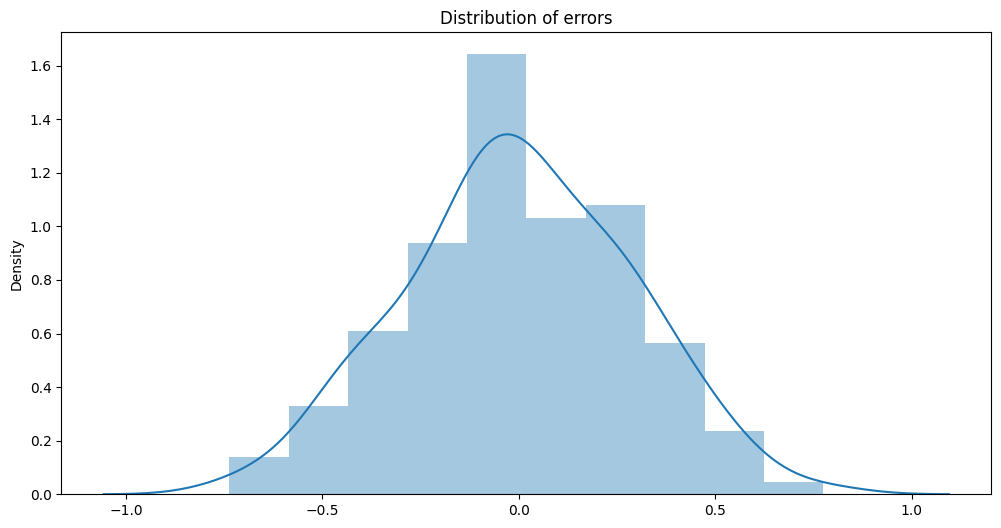

In [57]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of errors')
sns.distplot(fii2.resid)
plt.show()

# Model after first feature selection

In [63]:
a2, b2 = dmatrices('total_victims ~ prior_signs_mental_health_issues_Unclear + prior_signs_mental_health_issues_Yes + race_Other', data = df_final, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(b2.values, i) for i in range(b2.shape[1])]
vif['variable'] = b2.columns
vif

,VIF,variable
0,2.820000,Intercept
1,1.402868,prior_signs_mental_health_issues_Unclear
2,1.215319,prior_signs_mental_health_issues_Yes
3,1.187549,race_Other


In [64]:
model3 = sm.OLS(a2, b2)
fii3 = model3.fit()
fii3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_victims   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     5.691
Date:                Tue, 27 Jun 2023   Prob (F-statistic):            0.00106
Time:                        11:13:41   Log-Likelihood:                -32.235
No. Observations:                 141   AIC:                             72.47
Df Residuals:                     137   BIC:                             84.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    1.5163      0.044     34.751      0.000       1.430       1.603
prior_signs_mental_health_issues_Unclear    -0.1594      0.085     -1.879      0.062      -0.327       0.008
prior_signs_mental_health_issues_Yes         0.1177      0.057      2.055      0.042       0.004       0.231
race_Other                                   0.5237      0.171      3.071      0.003       0.186       0.861
==============================================================================
Omnibus:                        0.040   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.101
Skew:                           0.039   Prob(JB):                        0.951
Kurtosis:                       2.895   Cond. No.                         7.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Model

In [65]:
a3, b3 = dmatrices('total_victims ~ prior_signs_mental_health_issues_Yes + race_Other', data = df_final, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(b3.values, i) for i in range(b3.shape[1])]
vif['variable'] = b3.columns
vif

,VIF,variable
0,2.073529,Intercept
1,1.028786,prior_signs_mental_health_issues_Yes
2,1.028786,race_Other


In [66]:
model4 = sm.OLS(a3, b3)
fii4 = model4.fit()
fii4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_victims   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     6.649
Date:                Tue, 27 Jun 2023   Prob (F-statistic):            0.00175
Time:                        11:15:49   Log-Likelihood:                -34.030
No. Observations:                 141   AIC:                             74.06
Df Residuals:                     138   BIC:                             82.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.4741      0.038     39.043      0.000       1.399       1.549
prior_signs_mental_health_issues_Yes     0.1599      0.053      3.006      0.003       0.055       0.265
race_Other                               0.4065      0.160      2.538      0.012       0.090       0.723
==============================================================================
Omnibus:                        0.290   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.115
Skew:                           0.063   Prob(JB):                        0.944
Kurtosis:                       3.062   Cond. No.                         6.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

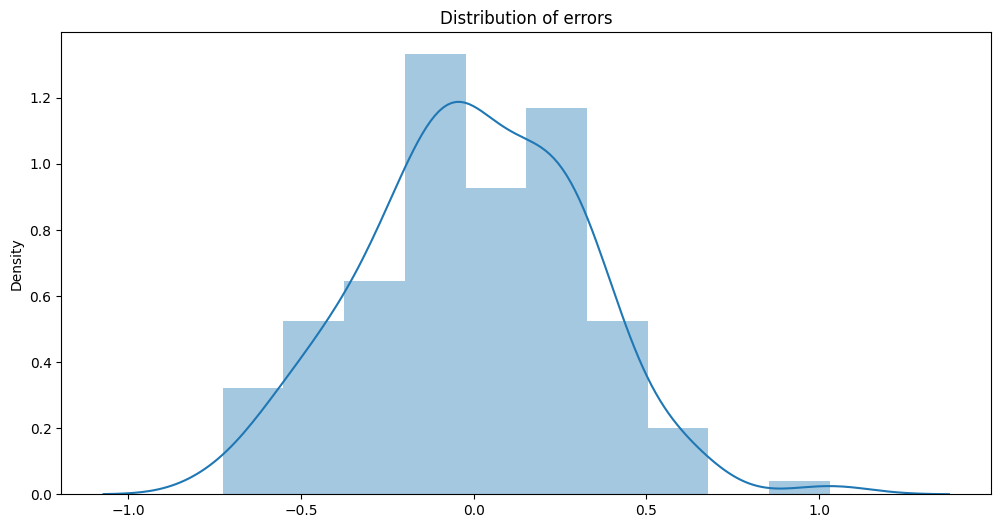

In [67]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of errors')
sns.distplot(fii4.resid)
plt.show()

# We find that shooters having mental health issues and 'other' race are linearly dependent on the total victims in the mass shooting